# Preparing data for Predictive Modelling


A good data should bring an actionable insight to the stakeholders. Before deep divinginto an actionale insights, it is better for us to build a model to make a good solution for the stakeholders. There are two essentials things that we have to be pay attention :
1. **Determine** the business process needs by speaking with the stakeholders. Ensuring the data understanding for generating ideas.
2. **Look** at the available data and try to connect it with business needs. Make sure to understand the data fields applied to select a target metric to model and set of features that can provide insights into business needs.


# Undestanding Data from a Modelling Perspective

When attempting to understand a business problem in the context of machine learning, we need to identify whether the problem tends to supervised learning, unsupervised learning or reinform¥cement learning. Can the problem be solved by modelling a target variable? is it numerical or categorical? The answers to these questions will allow us to identify which modelling algorithms will be relevant to our problem. 

# Preparing Data for Modeling
The aspect of data prprocessing for machine learning taht usually takes the longest is cleaning up the messy data. Some estimates sugest that data scientists spend two thirds of their work time cleaning and organizing datasets. This includes :
1. Merging datasets on common fields
2. Feature engineering to improve the quality of data
3. Removing or filling incorrect or missing values
4. Dropping duplicate records
5. Building training datasets by standardizing or normalizing the data and applying train test

In [2]:
#Lets begin and explore the data
import pandas as pd
import numpy as np
import datetime 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set() 
plt.rcParams["figure.figsize"] =(9,6)
plt.rcParams["axes.labelpad"] = 10
sns.set_style("darkgrid")

In [3]:
#check version of libraries use
%load_ext watermark
%watermark -d -v -m -p requests,numpy,pandas,matplotlib,seaborn,sklearn

2020-08-13 

CPython 3.7.6
IPython 7.12.0

requests 2.22.0
numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
seaborn 0.10.0
sklearn 0.22.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


Suppose you are hired to do freelance work for a company who wants to find insights into why their employees are leaving. They have compiled a set of data they think will be helpful in this respect. It includes details of employee satisfaction levels, evaluations, time spent at work, department, and salary.
The company shares their data with you by sending you a file called hr_data.csv and asks you what you think can be done to help stop employees from leaving.

1. Our aim is to apply the concepts we've discussed thus far to a real-life problem. In particular, we seek to do the following:

2. Determine a plan for using data modeling to provide impactful business insights, given the available data.
Prepare the dataset for use in machine learning models.




In [36]:
#load the dataset
%% bash
head ../The-Applied-Data-Science-Workshop


SyntaxError: invalid syntax (<ipython-input-36-0cd61d33920c>, line 3)

In [37]:
with open("../data/hr-analytics/hr_data.csv","r") as f:
    for _ in range(10):
        print(next(f).strip())

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0.38,0.53,2,157,3,0,yes,0,,sales,low
0.8,0.86,5,262,6,0,yes,0,yes,sales,medium
0.11,0.88,7,272,4,0,yes,0,,sales,medium
0.72,0.87,5,223,5,0,yes,0,,sales,low
0.37,0.52,2,,,0,yes,0,no,sales,low
0.41,0.5,2,,,0,yes,0,,sales,low
0.1,0.77,6,247,4,0,yes,0,,sales,low
0.92,0.85,5,259,5,0,yes,0,,sales,low
0.89,1,5,224,5,0,yes,0,,sales,low


In [38]:
df =pd.read_csv("../data/hr-analytics/hr_data.csv")

In [39]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [40]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                 157.0   
1                0.80             0.86               5                 262.0   
2                0.11             0.88               7                 272.0   
3                0.72             0.87               5                 223.0   
4                0.37             0.52               2                   NaN   

   time_spend_company  work_accident left  promotion_last_5years is_smoker  \
0                 3.0              0  yes                      0       NaN   
1                 6.0              0  yes                      0       yes   
2                 4.0              0  yes                      0       NaN   
3                 5.0              0  yes                      0       NaN   
4                 NaN              0  yes                      0        no   

  department  salary  
0      sales     low  
1      sales  medium  
2      sales  medium  
3      sales     low  
4      sales     low

In [41]:
df.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident left  \
14994                 151.0                 3.0              0  yes   
14995                 160.0                 3.0              0  yes   
14996                 143.0                 3.0              0  yes   
14997                 280.0                 4.0              0  yes   
14998                 158.0                 3.0              0  yes   

       promotion_last_5years is_smoker department salary  
14994                      0       NaN    support    low  
14995                      0       NaN    support    low  
14996                      0       NaN    support    low  
14997                      0       NaN    support    low  
14998                      0       NaN    support    low

In [42]:
#Check the number of rows and columns
df.shape

(14999, 11)

In [43]:
#Check how the left target is distributed
df.left.value_counts()

no     11428
yes     3571
Name: left, dtype: int64

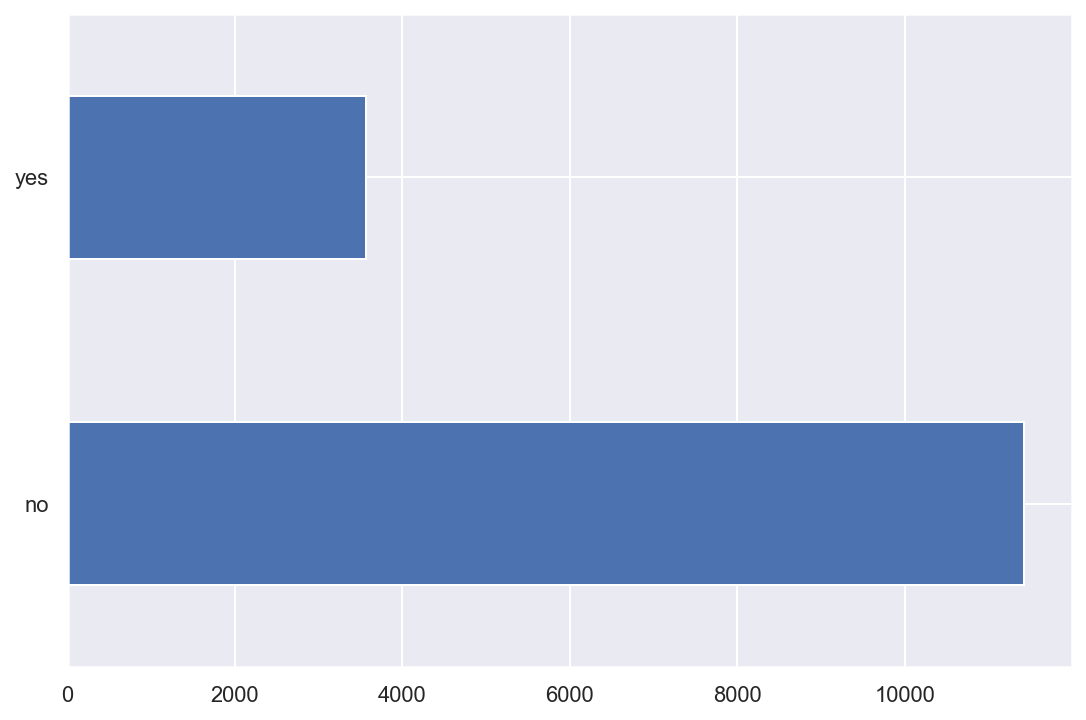

In [45]:
#Visualize the percentage of left target
df.left.value_counts().plot(kind="barh")
plt.show()

We can see the percentages of employeers who have not left are about three-quarters. This tells us that we are dealing with imbalanced classification problem which means we will have to take special measures to account for each class when calculating accuracies. 

In [46]:
#Check for missing values
df.left.isnull().sum()

0

In [48]:
#we have a mix of continuous and discrete features
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

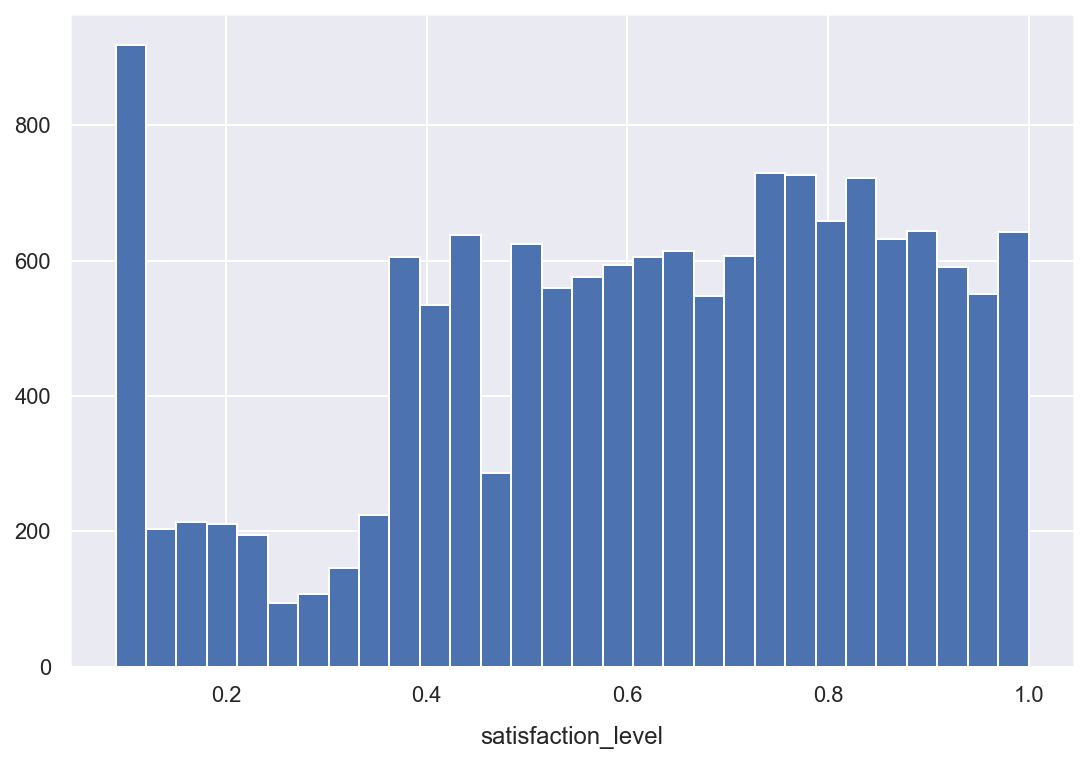

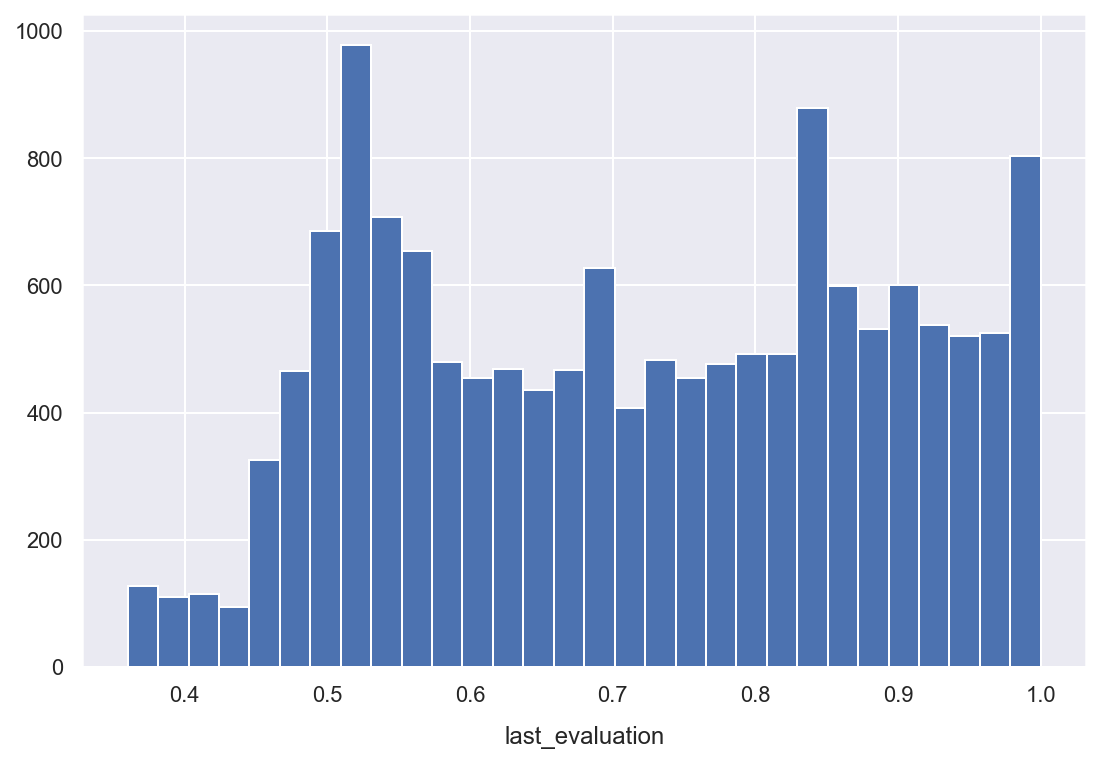

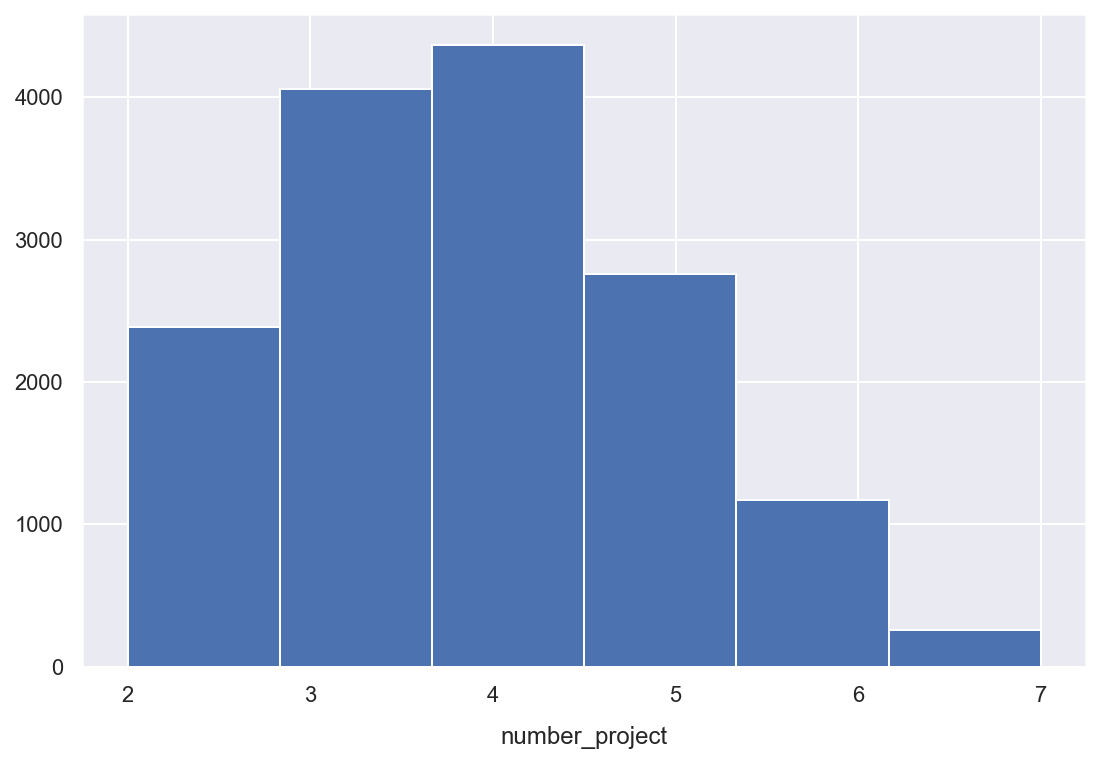

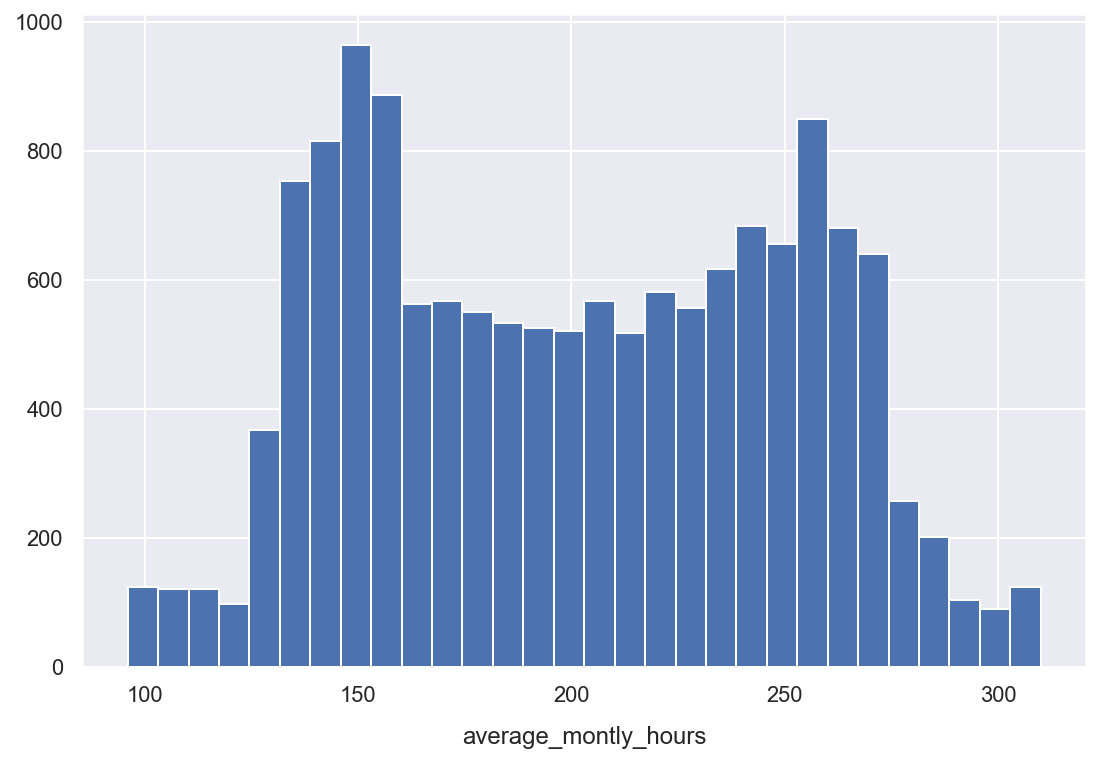

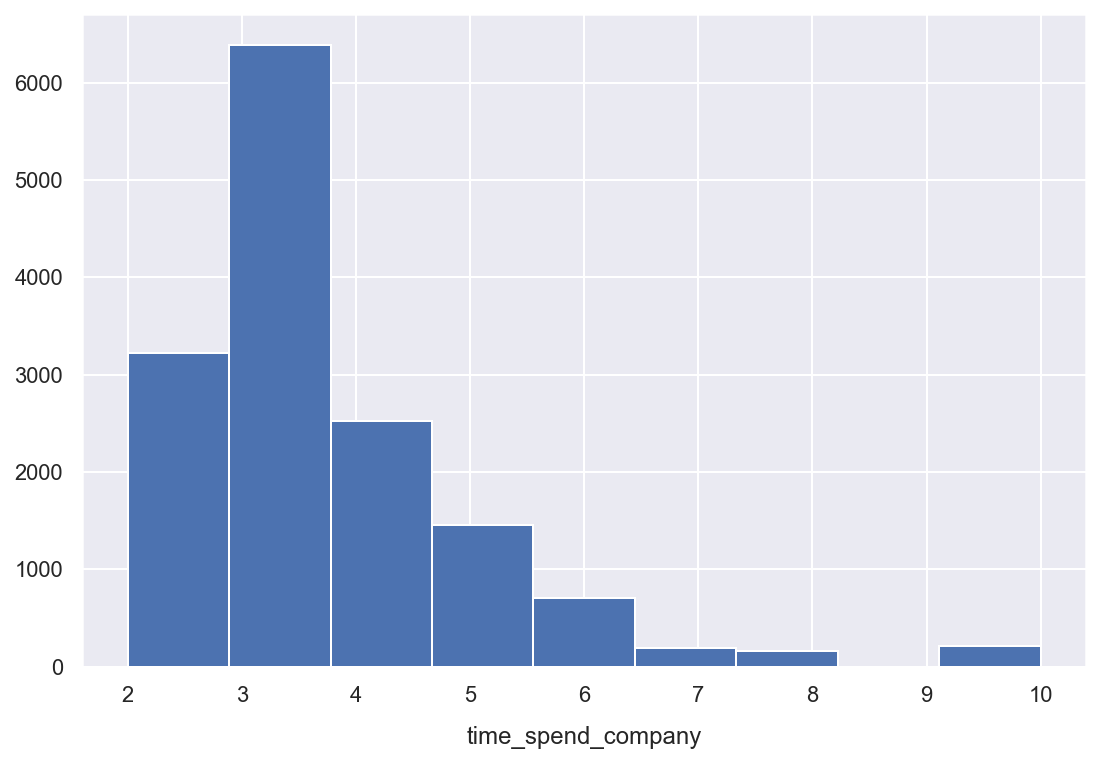

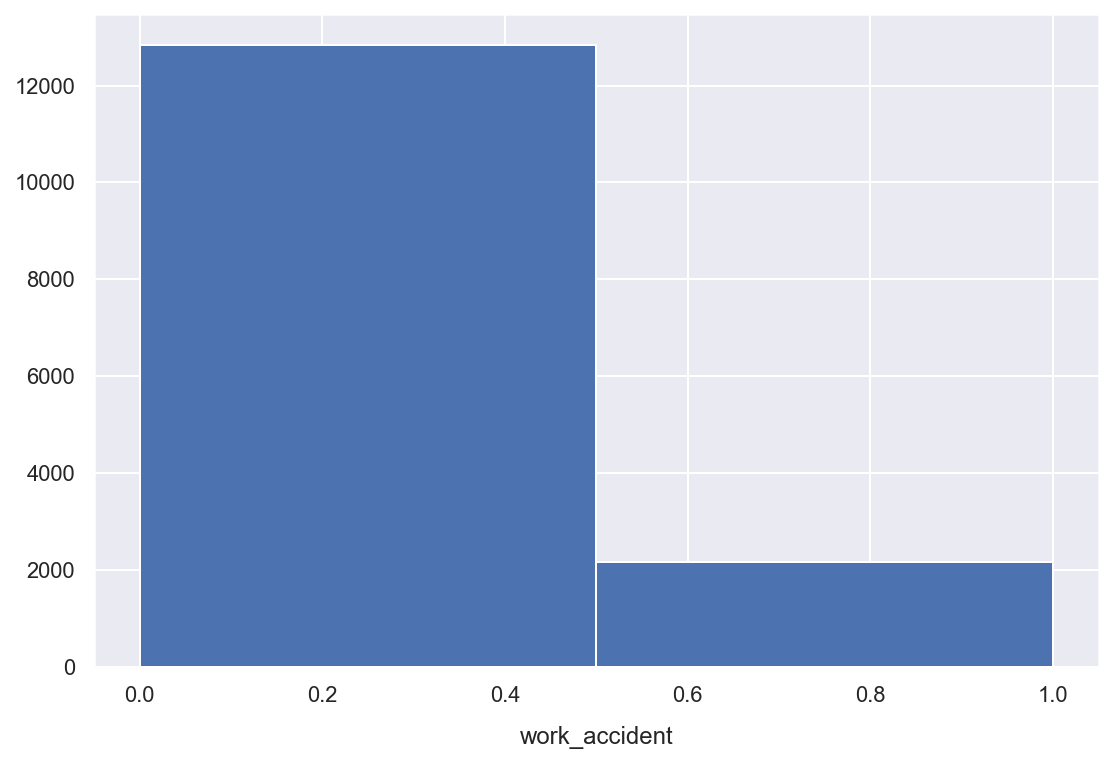

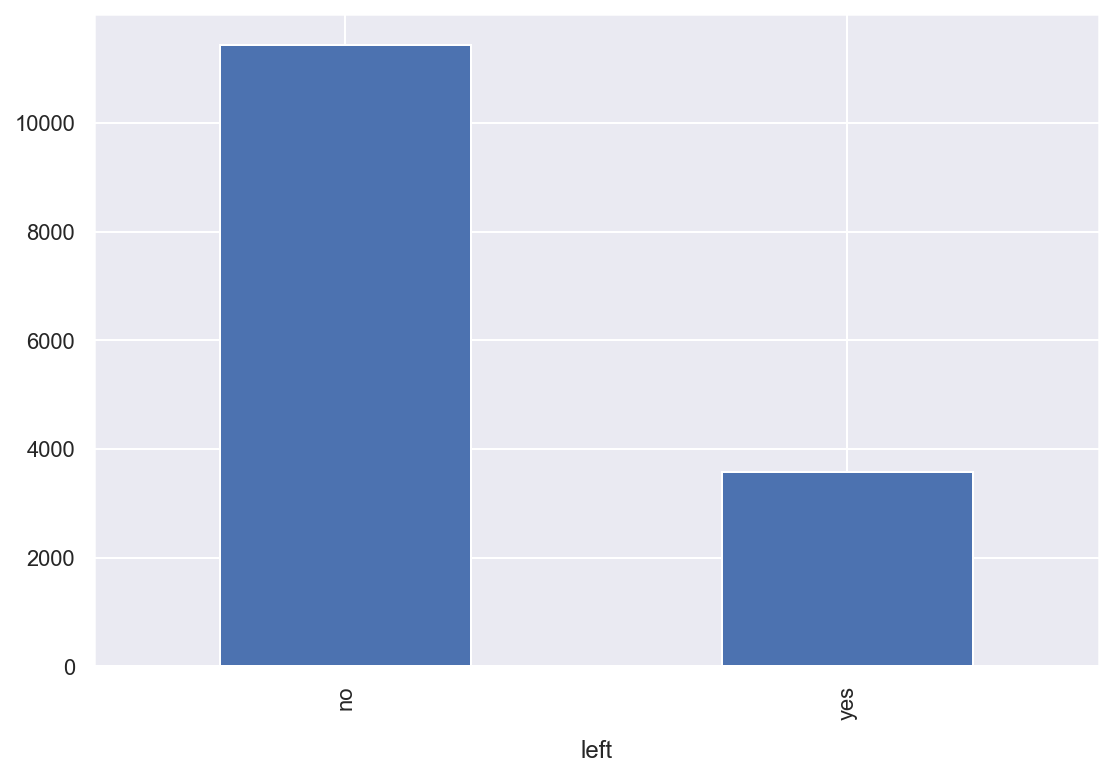

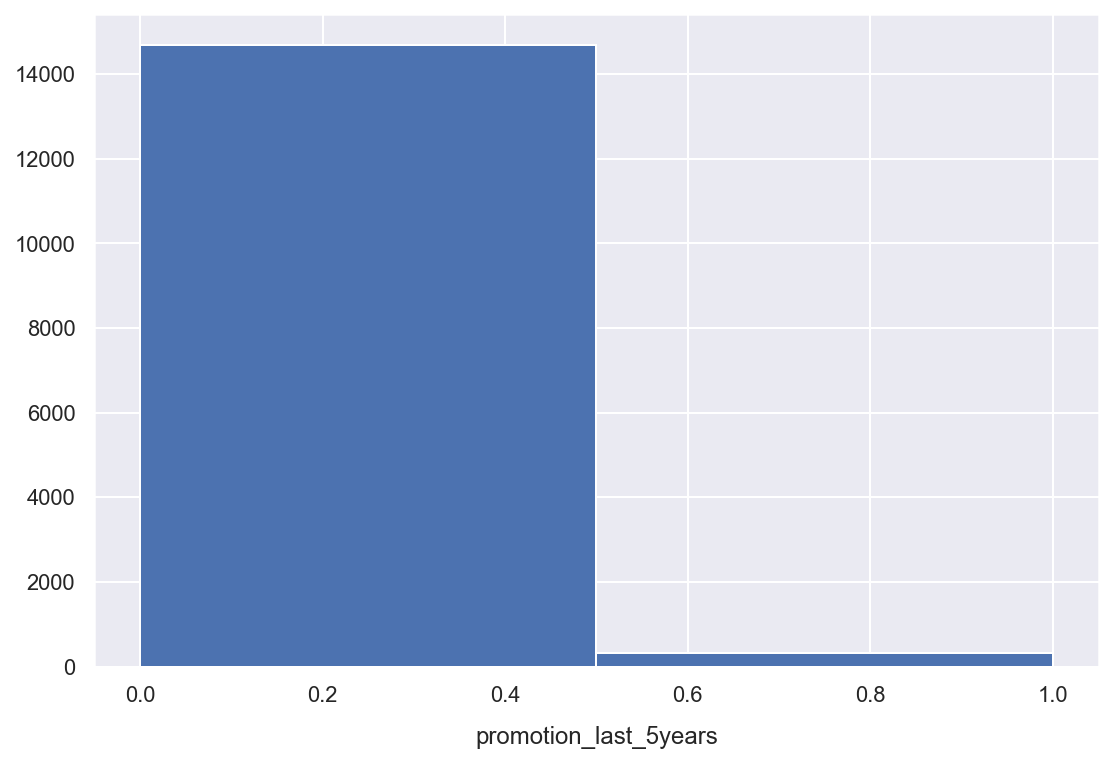

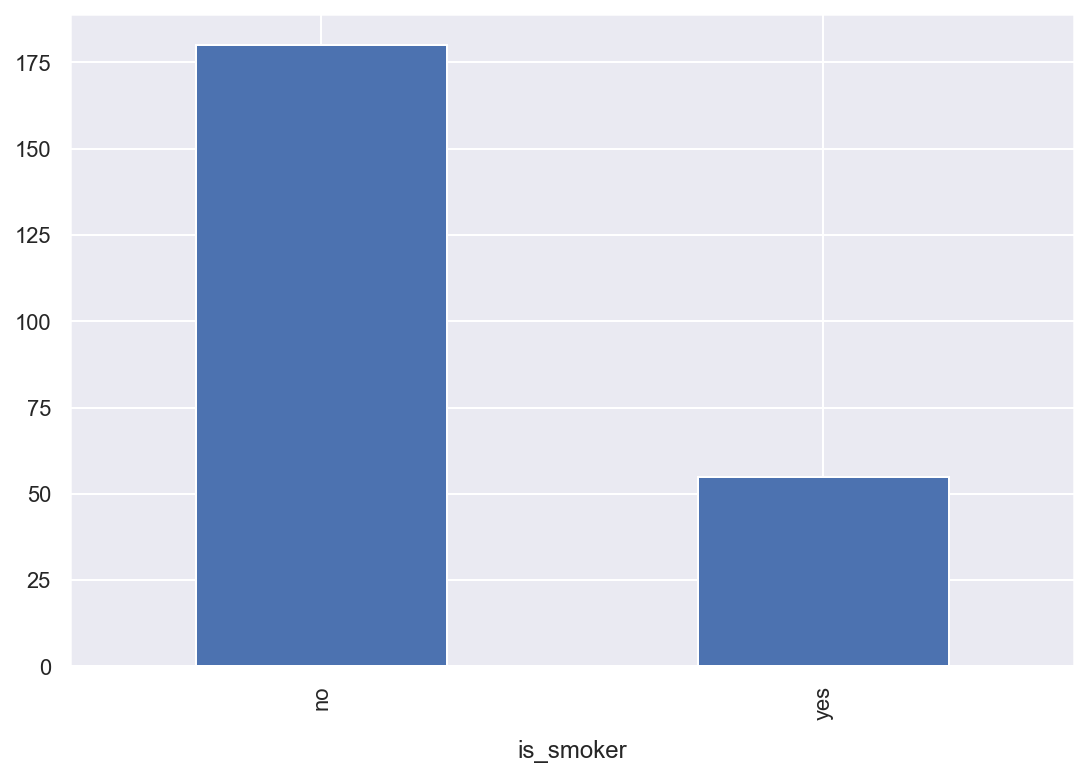

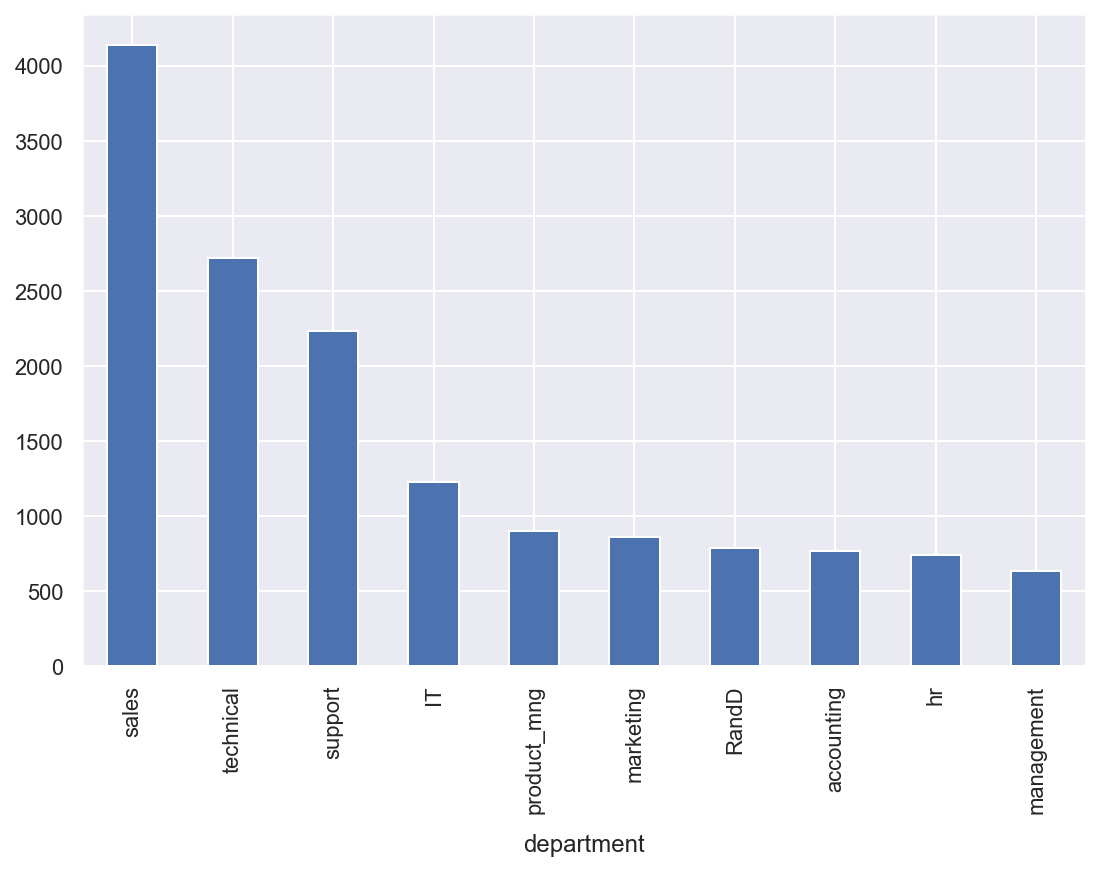

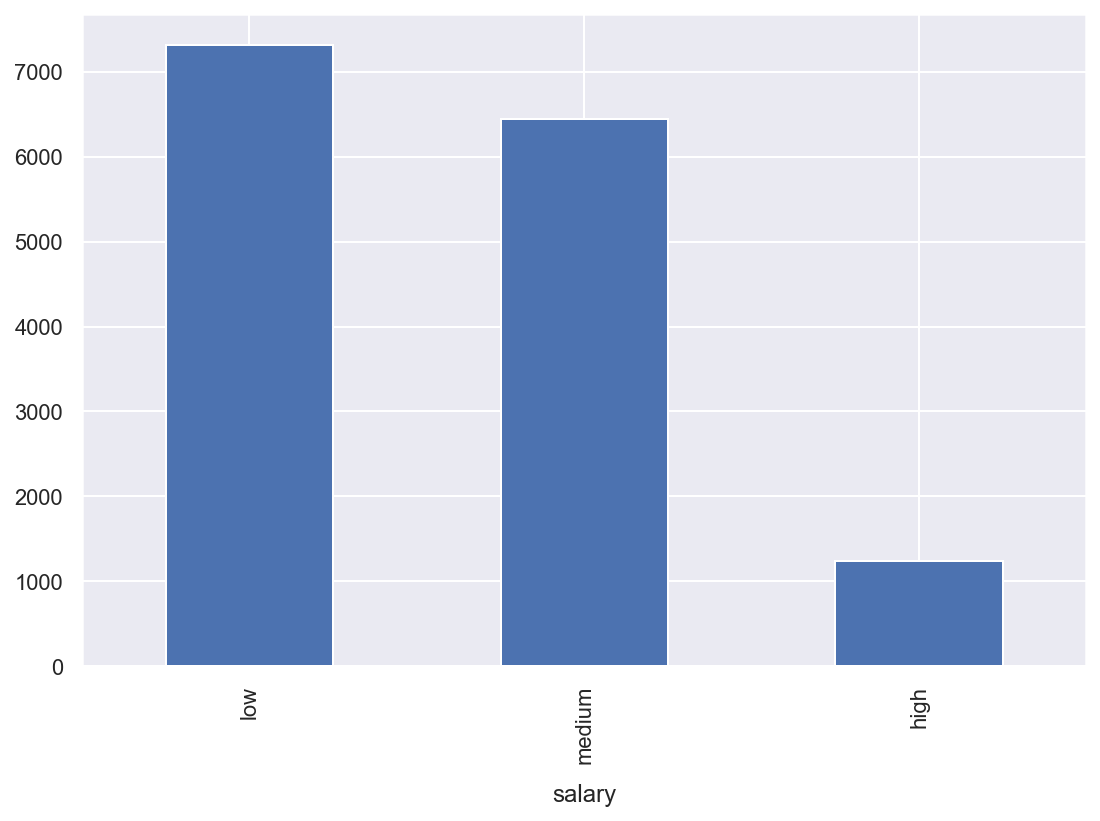

In [51]:
#Display the feature distribution

for f in df.columns:
    fig = plt.figure()
    s = df[f]
    if s.dtype in ("float", "int"):
        num_bins = min((30, len(df[f].unique())))
        s.hist(bins=num_bins)
    else:
        s.value_counts().plot.bar()
    plt.xlabel(f)

We can see a wide distribution over the possible values, indicating a good variety in the featires spaces. This is encouraging, features that are strongly grouped around a small range of values may not be very informative for our model. for instance, the case for promotional_last_5years where the vast majority of samples are 0.

In [52]:
#Check hhow many null values 
df.isnull().sum() /len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

We can see that there are about 2.5% missing values for average_monthly_hours, 1% missing for time_spend_company and 98% missing for is_smoker.


In [53]:
del df["is_smoker"]

In [54]:
# fill nan values in time_spend_company columns with median
fill_value =df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

The final column to deal with is average_monthly_hours. We could do something similar to what we did previously and use the median or mean as the integer fill value. 

In [55]:
df.isnull().sum() /len(df) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

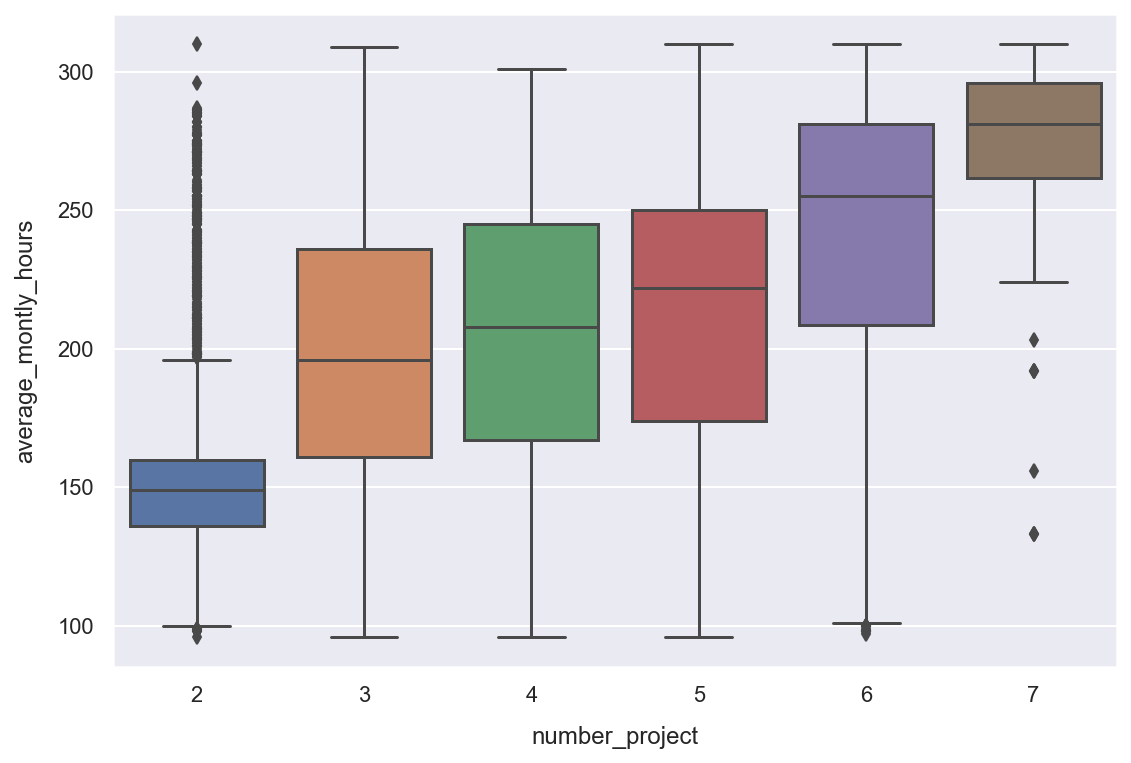

In [58]:
sns.boxplot(
    x = "number_project",
    y = "average_montly_hours",
    data = df
)

We can see that the number of projects is correlated with average_monthly_hours , a result that is hardly surprising. We will exploit this relationship by filling in NaN values of average_montly_hours based on the numbers of projects for the record. We will use the mean for each group

In [59]:
mean_per_project = (
    df.groupby("number_project")
    .average_montly_hours.mean()
)
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

In [61]:
fill_values = df.number_project.map(mean_per_project)
df.average_montly_hours =(
    df.average_montly_hours.fillna(fill_values)
)

In [62]:
#Check the Nan Values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Transform the string and boolean fields into integer representation. We will manually convert the left table variable from yes and no into 1 and 0 and build the one-hot encoded features

In [63]:
df.left = df.left.map({"no" : 0, "yes" :1})
df =pd.get_dummies(df)

In [66]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

We can see that department and salary have been split into various one-hot encoded features. The other part for preparing our data is to scale the features, We will learn more about feature scaling when we train our first models on the dataset.

In [67]:
df.to_csv('../data/hr-analytics/hr_data_processed.csv', index=False)

# Training Classification Models

Having decided on a general modelling approach, we should be careful to avoid common pitfalls of training ML models as we proceed with modelling. First, we have to remember that training data is very important. Increasing the number of training data has a larger impact than model selection on scoring performances. One issue is that there may not be enough data available, which could make patterns difficult to find and cause models to perform poorly. Some possible issues include the following :
1. Non-representative training data(sampling bias)
2. Error in the records set(such as recorded weight in kg instead of pounds)
3. Outliers
4. Unfilled missing valuse
5. Bad Features

on the modelling side, you should avoid overfitting which happends when the models fits too well on the training data so that it fails to generalize to testing samples. Similarly, we also avoid underfitting , where the model is not able to capture the interesting patterns that would yield higher accuracy. The solution to avoid these problems by trying many different types of models and being careful to follow best practices such as K-fold crss validation , Model Validation and Optimization. 

There are three types of classification models such as Support Vector Machines(SVM), Random Forest, and K-Nearest Classifiers(KNN). Each of these alforithms is quite different. luckily, we could scikit-learn for implementing all of these algorithms.

1. **SVM** attempt to find the best hyperplane to divide classes. This is done by maximizing the distance between hyperplane and the closest records of each class, which are called support vectors. We can use linear and non-linear by using kernel trick.

2. **Random Forest** are an ensemble of decision tree. where each has been trained on different subsets of training data. For instance, a Random classifier might take the average result of many hundreds of decision trees in order to make a classification. A classification decision tree predicts the class of a given record based on a series of cascading decisions.

3. **KNN** classification memorize the training data and make predictions depending on the k-nearest records in the feature space. With three features, this can be visualized as sphere surrounding the prediction sample. However, we will be dealing with more than three features and therefore hyperspheres are drawn to find the closest k records. 

Enough with the theory. Lets dive deep into the code using scikit-learn. We will continue working with the cleaning HR dataset to determine the probability of an employee leaving the company. 

In [68]:
import numpy as np
import pandas as pd
import datetime 
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [69]:
%load_ext watermark
%watermark -d -v -m -p requests,numpy,pandas,matplotlib,seaborn,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-08-13 

CPython 3.7.6
IPython 7.12.0

requests 2.22.0
numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
seaborn 0.10.0
sklearn 0.22.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [71]:
# We will start using left feature where 1 is True and 0 is False
df = pd.read_csv("../data/hr-analytics/hr_data_processed.csv")

In this part, we will be training classification models on two sets of continuous features : satisfaction_level and last_evaluation. Based on the previsou histogram, we can see how they are distributed rather evenly between 0 and 1. 

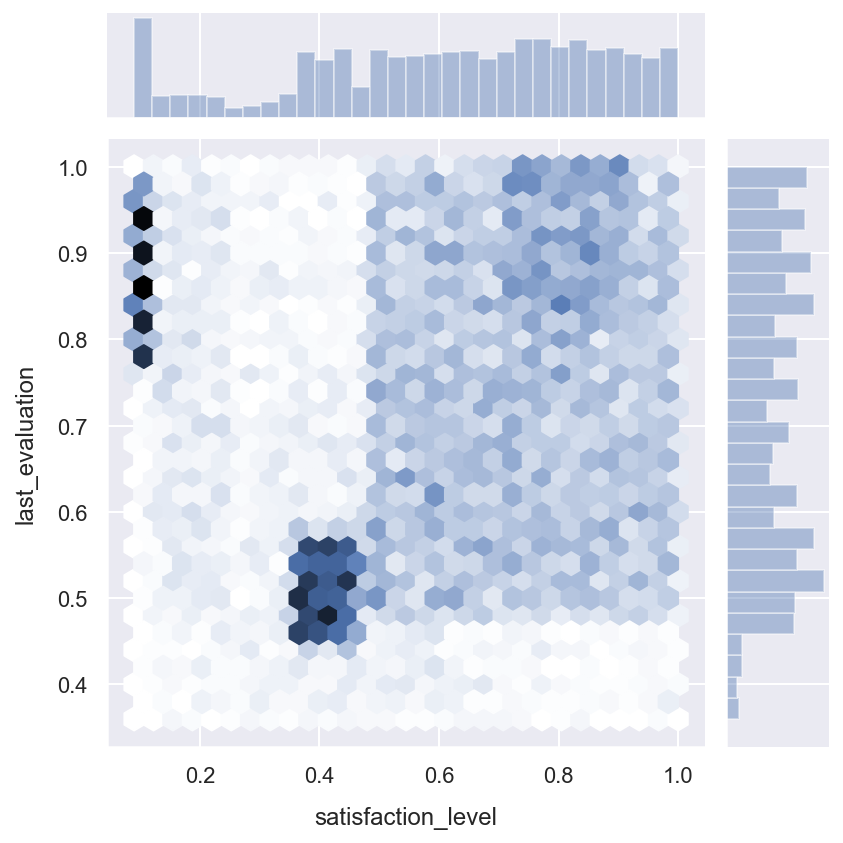

In [72]:
sns.jointplot(
    x ="satisfaction_level",
    y = "last_evaluation",
    data = df,
    kind ="hex"
)

The preceding density chart is useful but it would be more interesting to see how this distribution differs when comparing employees who have left with those who have stayed in the company. 

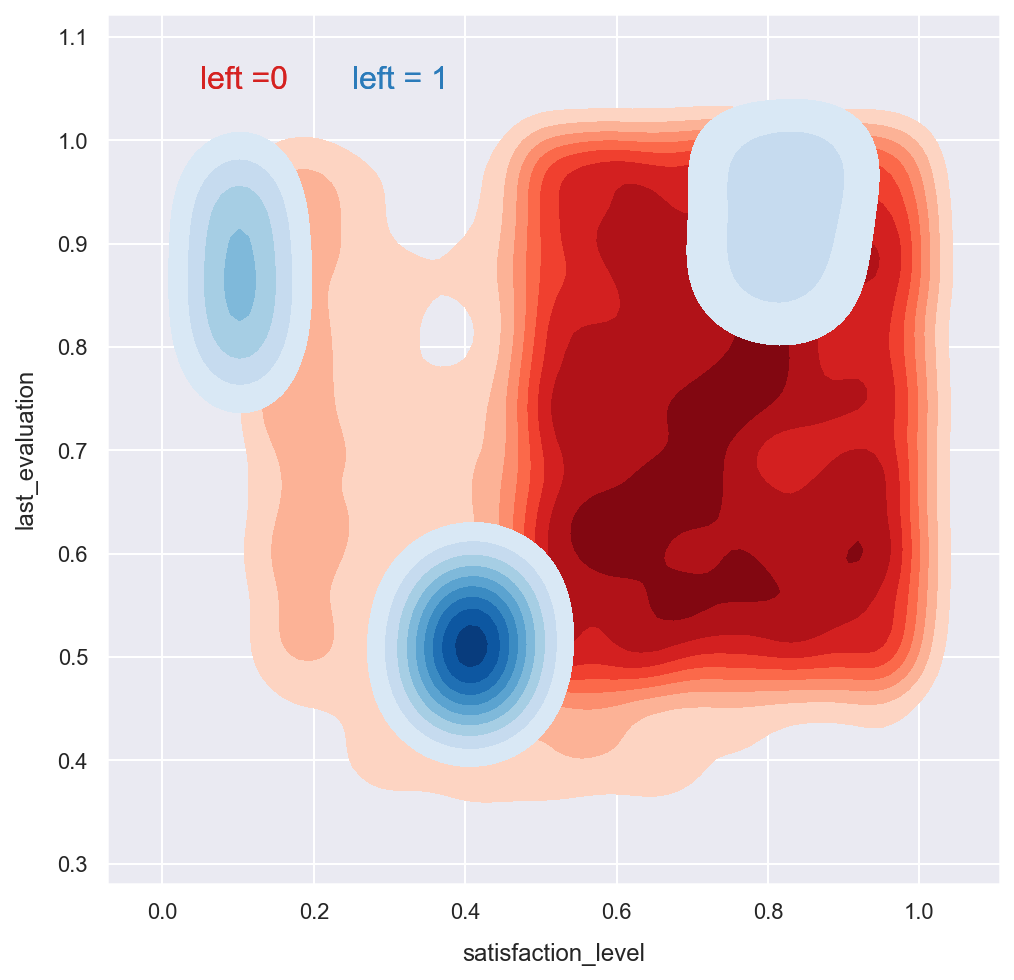

In [76]:
fix, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest =False)
for i,c in zip((0,1), ("Reds","Blues")):
    sns.kdeplot(
        df.loc[df.left==i, "satisfaction_level"],
         df.loc[df.left==i, "last_evaluation"],
        cmap = c,
        **plot_args
    )
    ax.text(
        0.05, 1.05,"left =0 " ,
        size = 16,
        color = sns.color_palette("Reds")[-2]
        
    )
    ax.text(
    0.25, 1.05, 'left = 1',
    size=16, color=sns.color_palette('Blues')[-2]
)

We can see how the patterns are related to the target variable. For the remainder of the exercise , try to exploit these pattern to trian effective  classification models. 

In [80]:
#split the data into training and test sets

from sklearn.model_selection import train_test_split
features =["satisfaction_level", "last_evaluation"]
X_train, X_test, y_train,y_test = train_test_split(
    df[features].values,
    df["left"].values,
    test_size =0.3,
    random_state = 1
    
)

In [81]:
# Load StandardScaler class for fitting the training set and transform

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**Caution**

An easy mistake to make when training machine learning models is to fit the scaler on the whole dataset, when in fact it should only be fit to the training data. For instance, scalling the data before splitting it inot training and testing sets is a mistake.


In [84]:
#Import scikit-learn SVM class
from sklearn.svm import SVC
svm = SVC(kernel ="linear", C= 1, random_state =1, gamma ="scale")
svm.fit(X_train,y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [85]:
#Compute the accuracy 
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test,y_pred)
print("accuracy = {:.1f}%".format(acc*100))

accuracy = 75.9%


Here, we can see the scikit-learn accuracy_score function which takes two arguments looks promising at ~75% which is not bad for our first model. With this mind, we need to think about the individual class accuracies, in addition to the overall accuracy. To look at the accuracy within each target class, we use **confusion matrix** which is 2*2 table with actual classes on the horizontal axis and predicted classes on the vertical axis.

A perfect classifier would have all predictions as **either True Positive or True Negative and show zeros on the off-diagonal entries for False Positive  and false Negative**


In [89]:
from sklearn.metrics import confusion_matrix 
cmat = confusion_matrix(y_test,y_pred)
cmat

array([[3416,    0],
       [1084,    0]])

Comparing with the confusion reference table, we can see that our model is predicting all the test records as class 0 and we get over 1,084 False Negative which is not good.

In [90]:
print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%


as we can see, the model is simply classifying every sample as 0 meaning that it is predicting that no employees in the test set will leave the company. Clearly, this is not helpful at all. Let's use a countrour plot to show predicted class at each point in feature space. 

/Applications/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


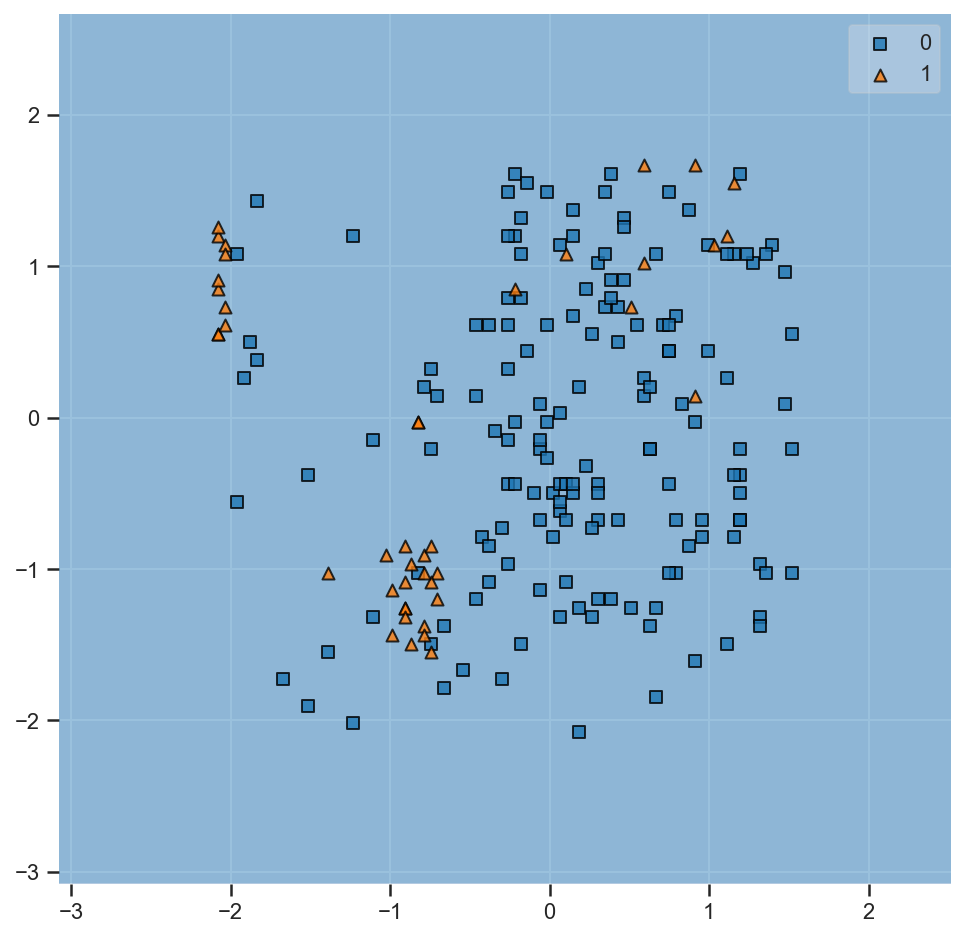

In [93]:
from mlxtend.plotting import plot_decision_regions
N_samples = 200
X,y = X_train_std[:N_samples],y_train[:N_samples]
plot_decision_regions(X,y,clf=svm)

based on the function plot decision regions, along with a set of records that are passed as arguments. In order to see the decision regions properly without too many records obstructing our view, we only pass a 200- record sample of the test data to the plot_decision_regions function. We see the result is entirely red, meaning that every point in the feature space will be classified as 0.
It should not be surprising that a linear model cant do a good job of describing these nonlinear patterns. If the dataset was linearly separable, we would be able to separate the majority of records from each class using a straight line. Recall the kernel trick for using SVMs to classify nonlinear problems. Let's improve the result.

In [95]:
SVC?

In [103]:
svm = SVC(kernel ="rbf", C=1, random_state=1,gamma="scale")
svm.fit(X_train_std,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
#make a check_model_fit to make and compare models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions
def check_model_fit(clf,X_test,y_test):
    #Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc =accuracy_score(y_test,y_pred,normalize=True)*100
    print("total accuracy = {:.1f}%".format(acc))

In [104]:
check_model_fit(svm,X_test_std,y_test)

total accuracy = 89.7%


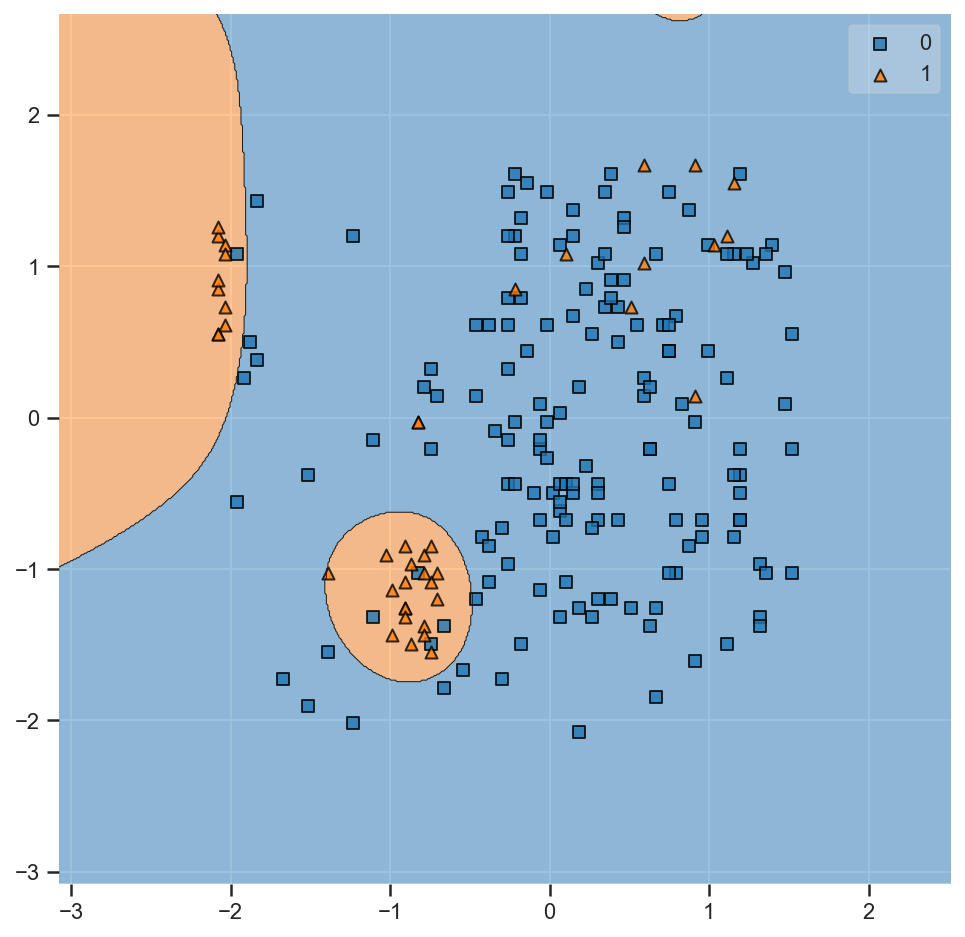

In [105]:
from mlxtend.plotting import plot_decision_regions
N_samples = 200
X,y = X_train_std[:N_samples],y_train[:N_samples]
plot_decision_regions(X,y,clf=svm)

This result is much better. We can see an overall accuracy of nearly 90% where the classs 1 accuracy is now 67% compared to 0% with linear SVM. We were able to capture the non-linear patterns in the data and correctly classify the majority of the employee who have left. 

# Training K-nearest Neighbors Classifiers with Scikit-Learn

When training our first models on HUman Rsource Analytics dataset, we saw how linear SVM and kernel SVM performed differently when modelling two slected features from the dataset. We will continue modelling these features satisfaction_level and last_evaluation, using **KNN algorithm**. Before implementing it, we will visualize what overfitting looks like and learn the strategy for handling it. 


In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)
check_model_fit(knn,X_test_std,y_test)

total accuracy = 90.9%


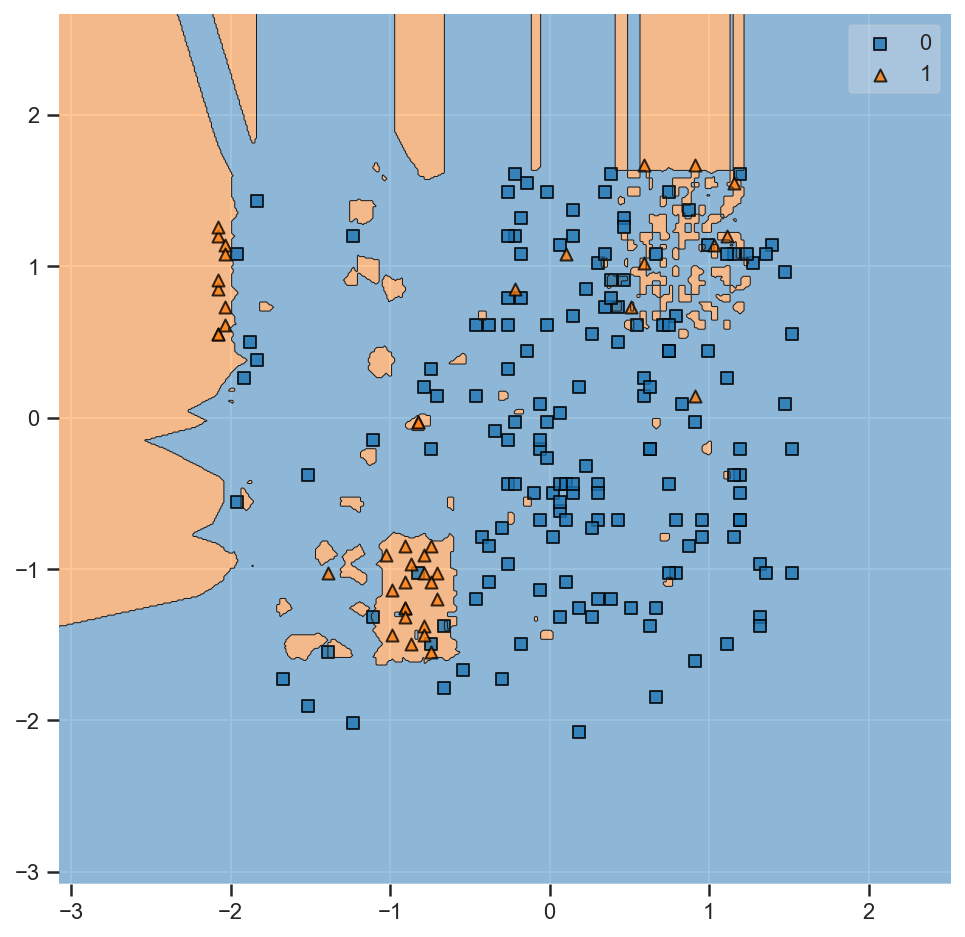

In [112]:
from mlxtend.plotting import plot_decision_regions
N_samples = 200
X,y = X_train_std[:N_samples],y_train[:N_samples]
plot_decision_regions(X,y,clf=knn)

Here we can see the overall accuracy which now scores over 90%. However, the decison region plot indicates that we are overfitting the data. This is evident by the hard, choppy decision boundary, and small pockets of class 1 prediction ranges by orange contours scattered throughout the feature space. We can soften the decision boundary and decrease overfitting by increasing the number of nearest neighbors used to make classification. 

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std,y_train)
check_model_fit(knn,X_test_std,y_test)

total accuracy = 91.6%


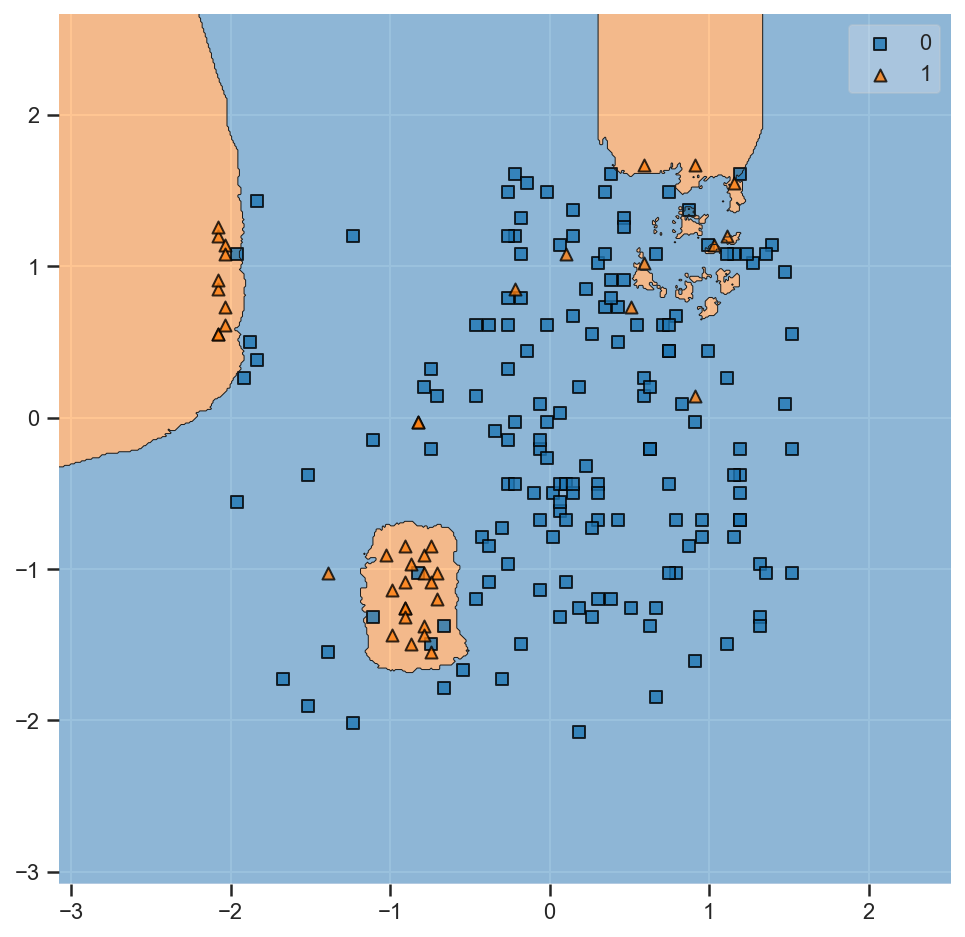

In [115]:
from mlxtend.plotting import plot_decision_regions
N_samples = 200
X,y = X_train_std[:N_samples],y_train[:N_samples]
plot_decision_regions(X,y,clf=knn)

As we can see, the decision boundaries are significantly less choppy compared to the plot for the n_neighbors = 3 model and there are far fewer pockets of class 1 prediction ranges. Looking ate the metrics, the accuracy for class 1 is slightly less, but we would need to use more comprehensive method such as k-fold cross validation to decide whether there is a significant difference between this model and n_neighbors = 3 model that we trained previously.  Note that increasing n_neighbors has no effect on training time as the model is simply memorizing the data. The prediction time, however, becomes longer as n_neighbors is increased.

# Training Random Forest Classifiers with Scikit-Learn

So far, we have trained SVMs and KNNs and seen what overfittng and underfitting looks like in terms of the decision boundary and resulting classification accuracy. We will continue to train our data using Random Forest and compare the results for our modelling problem to those from preceding algorithms.

total accuracy = 92.0%


(-0.2, 1.2)

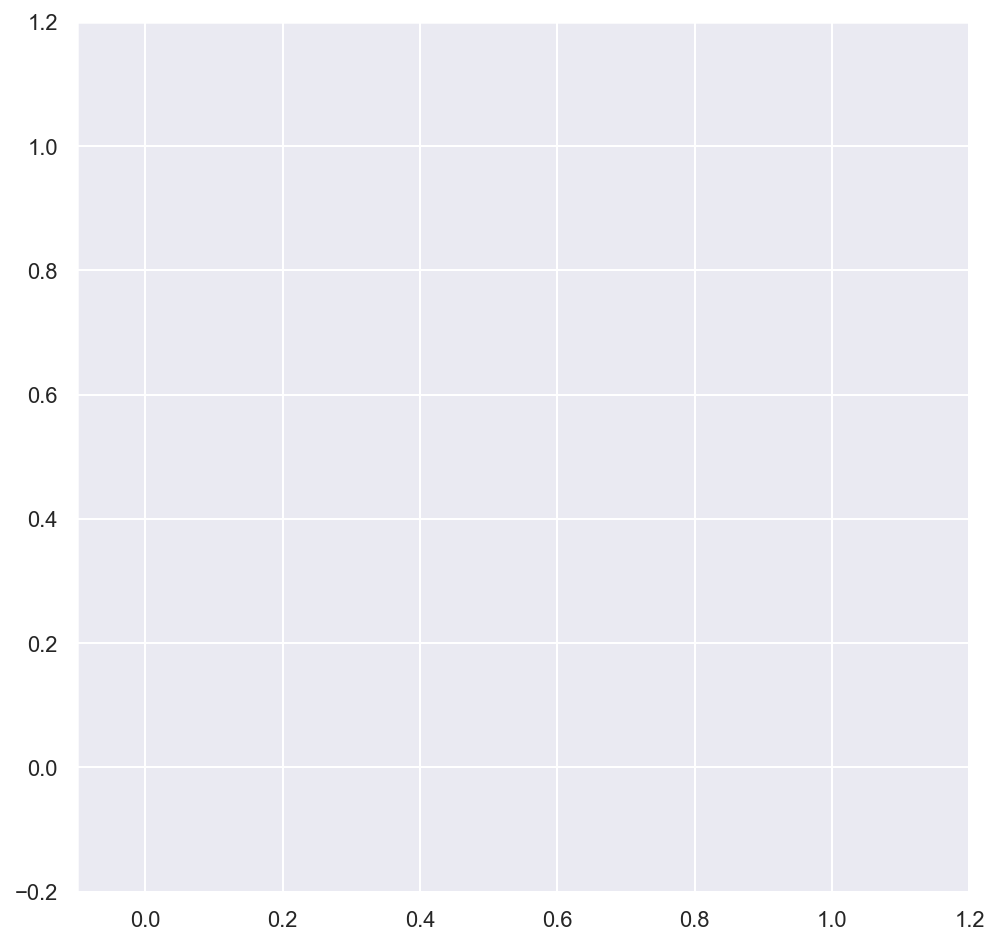

In [121]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
        n_estimators = 50,
        max_depth = 5,
        random_state = 1,
)
forest.fit(X_train,y_train)
check_model_fit(forest,X_test,y_test)
plt.xlim(-0.1,1.2)
plt.ylim(-0.2,1.2)

In [120]:
#Build a graph for the decision trees from our Random Forest
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    forest.estimators_[0],
    out_file=None,
    feature_names =features,
    class_names =["no","yes"],
    filled =True, rounded=True,
    special_characters =True,
)

graph = graphviz.Source(dot_data)
graph.render(
    filename='../figures/chapter-4-hr-analytics-tree-graph',
    format='png',
)

'../figures/chapter-4-hr-analytics-tree-graph.png'

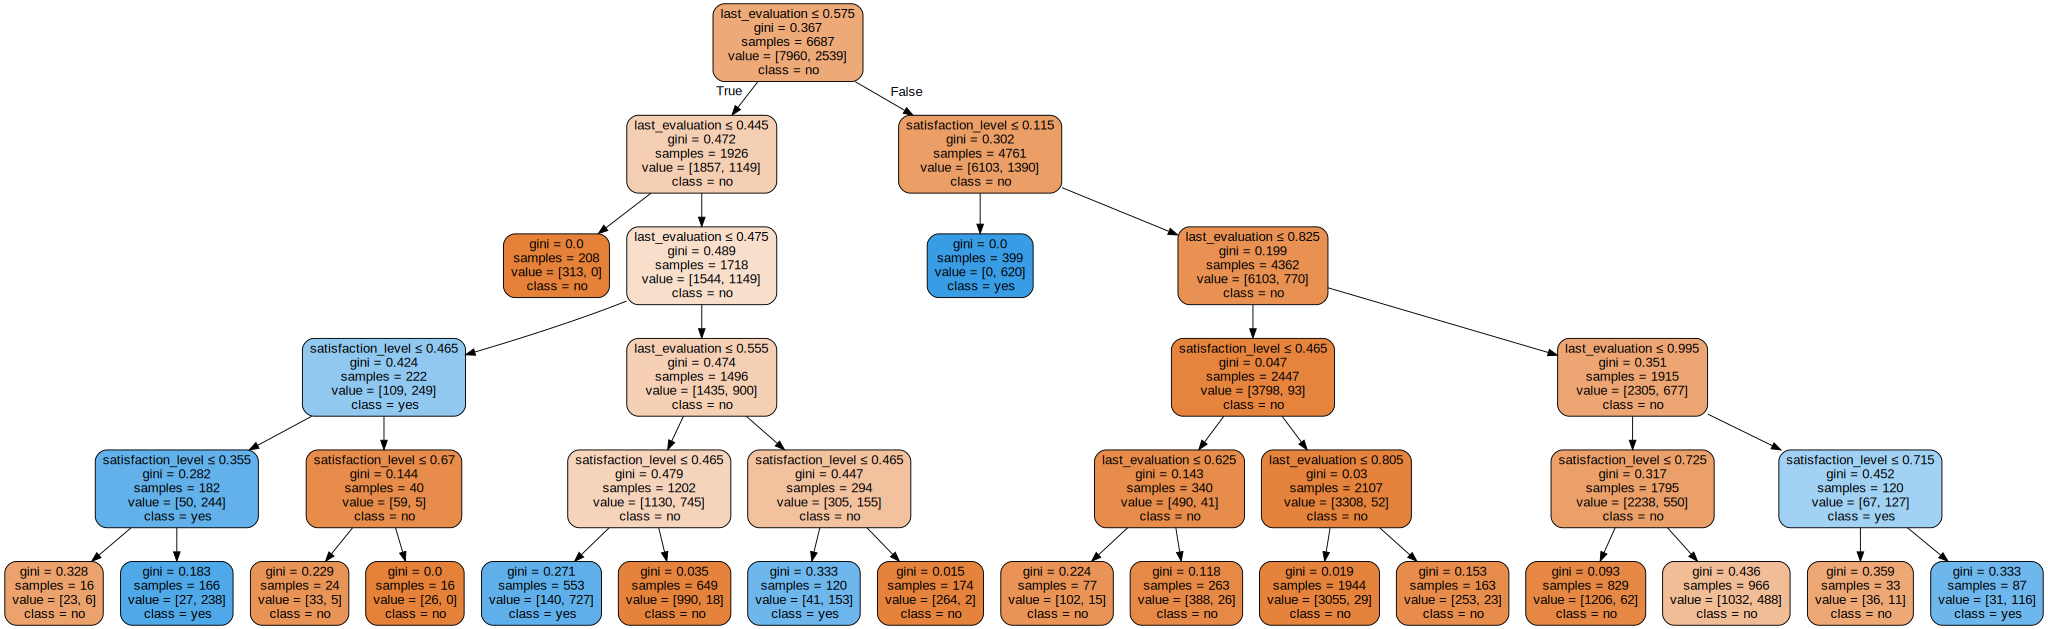

In [122]:
graph

From the preceding graph, we can see that each path is limited to five consecutive nodes as a result of setting max_depth = 5. Here we can see that 1,926 training samples from the top node have been split on the last_evaluation <= 0.445 condition, resulting in a child node that is pure with 208 no samples and a child node that is mixed with 1,544 no samples  and 1,149 yes samples. Recall that no correspondes to employees who are still working at the company, while yes corresponds to those who have left. The orange boxes represent nodes where the majority of samples are labelled no and the blue boxes representt nodes where majority of samples are yes . The shade of each box (light,dark,etc) indicates the confidence level which is related to purity of that node. 